In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Salary_Data.csv')

In [8]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [12]:
x = df['YearsExperience']
y = df['Salary']

In [13]:
type(x)

pandas.core.series.Series

In [15]:
x = df[['YearsExperience']]

In [16]:
type(x)

pandas.core.frame.DataFrame

In [17]:
x.shape

(30, 1)

In [18]:
y.shape

(30,)

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
xtrain, xtest, ytrain,ytest = train_test_split(x,y,train_size = 0.8,random_state =1)

In [21]:
xtest

,YearsExperience
17,5.3
21,7.1
10,3.9
19,6.0
14,4.5
20,6.8


In [22]:
ytest

17    83088.0
21    98273.0
10    63218.0
19    93940.0
14    61111.0
20    91738.0
Name: Salary, dtype: float64

In [25]:
#Model Buidling

from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [27]:
model.intercept_

25609.89799835482

In [28]:
model.coef_

array([9332.94473799])

In [31]:
ypred = model.predict(xtest)
ytest.values

array([83088., 98273., 63218., 93940., 61111., 91738.])

In [32]:
ypred

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

In [33]:
type(ypred)

numpy.ndarray

In [35]:
from sklearn.metrics import r2_score

In [37]:
r2result = r2_score(ytest,ypred)
print(r2result)#accuracy

0.7616681465472094


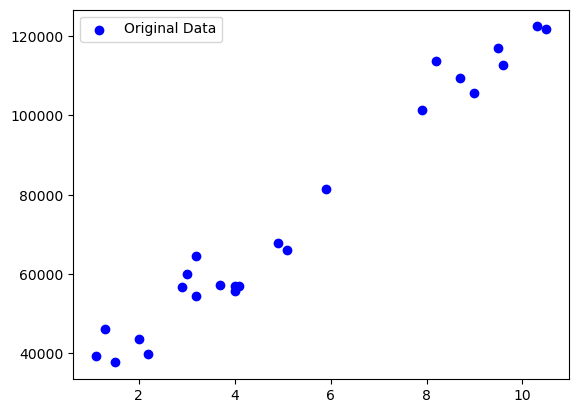

In [43]:
#Plotting for the training data and later comparing with predicted data
plt.scatter(xtrain,ytrain,color = 'blue',label = 'Original Data')
plt.legend()
plt.show()

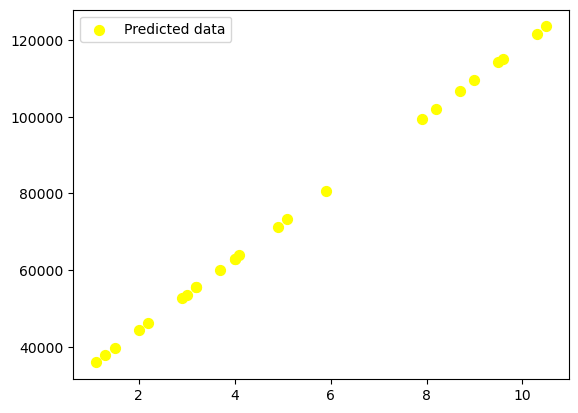

In [44]:
ypred_xtrain = model.predict(xtrain)
plt.scatter(xtrain,ypred_xtrain,color = 'yellow', s =50, label ="Predicted data")
plt.legend()
plt.show()

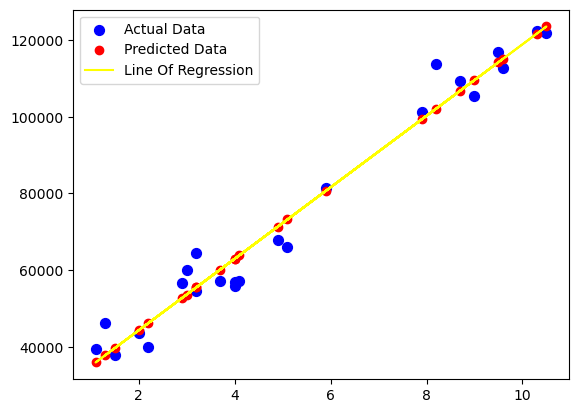

In [48]:
plt.scatter(xtrain,ytrain,color ='blue',label = "Actual Data", s = 50)
plt.scatter(xtrain,ypred_xtrain,color = 'red', label="Predicted Data")
plt.plot(xtrain,ypred_xtrain,color = "yellow",label ="Line Of Regression")
plt.legend()
plt.show()

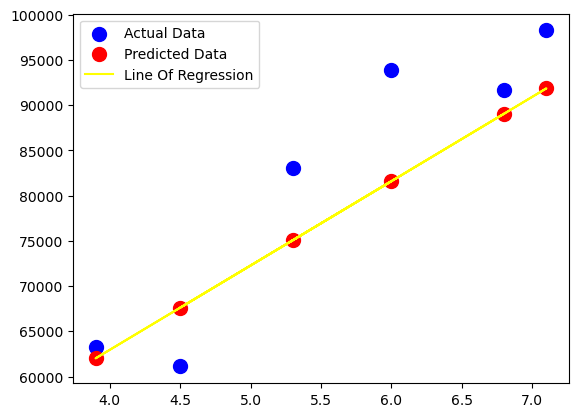

In [50]:
ypred_xtest = model.predict(xtest)
plt.scatter(xtest,ytest,color ='blue',label = "Actual Data", s = 100)
plt.scatter(xtest,ypred_xtest,color = 'red', label="Predicted Data",s=100)
plt.plot(xtest,ypred_xtest,color = "yellow",label ="Line Of Regression")
plt.legend()
plt.show()

In [51]:
#m = slope
#c = coeffcient 
#y = intercept
m = model.coef_
c = model.intercept_
print(m,c)

[9332.94473799] 25609.89799835482


In [55]:
accuracy = []
for i in range(1000):
    xtrain, xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.8, random_state = i)
    model = LinearRegression()
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    r2result = r2_score(ytest,ypred)
    accuracy.append(r2result)

accuracy

[0.988169515729126,
 0.7616681465472094,
 0.8886956733784562,
 0.9695039421049821,
 0.9504404484884268,
 0.9439628569611375,
 0.9368146227107088,
 0.8143022783109007,
 0.9631182154839476,
 0.9388416537799072,
 0.9816423482070253,
 0.940882728477622,
 0.9429269163491424,
 0.9394460269118793,
 0.9606215790278543,
 0.8697012433817218,
 0.7949890249259295,
 0.9384744808306155,
 0.8864330645841889,
 0.9415531751862448,
 0.9441299149555877,
 0.9398582853702571,
 0.8870702615446784,
 0.9184170849214232,
 0.9520702017424296,
 0.9531732818427658,
 0.9835849730044816,
 0.9636425773684422,
 0.9217841352107623,
 0.9467172742609804,
 0.9944092048209745,
 0.8967649524853983,
 0.8985995727228404,
 0.9350785573211586,
 0.9244141448042442,
 0.8839476512584652,
 0.955021106900739,
 0.9778242092591887,
 0.972479448737762,
 0.9928344802911049,
 0.7775083459037235,
 0.9802519469633169,
 0.9024461774180497,
 0.8688045158887867,
 0.934951117043928,
 0.9250487875802144,
 0.9789129767378081,
 0.98399193890564,

In [56]:
np.max(accuracy)

0.9969626143077172

In [57]:
np.argmax(accuracy)

543

In [58]:
import joblib
joblib.dump(model,'salary.pkl')

['salary.pkl']

In [59]:
#using saved model
model1 = joblib.load('salary.pkl')

In [60]:
model1.predict([[11]])#giving experience to get a salary

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([128042.47966025])

In [61]:
model1.predict([[10],[11],[12]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([118832.63411185, 128042.47966025, 137252.32520864])